In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot styling
sns.set(style="whitegrid")

# Notebook display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:0.3f}")


Loading the Dataset


In [4]:
# Path to training data
train_path = "../data/raw/cs-training.csv"

# Load dataset
df = pd.read_csv(train_path)

# Pehle 5 rows dikhana
df.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766,45,2,0.803,9120.000,13,0,6,0,2.000
1,2,0,0.957,40,0,0.122,2600.000,4,0,0,0,1.000
2,3,0,0.658,38,1,0.085,3042.000,2,1,0,0,0.000
3,4,0,0.234,30,0,0.036,3300.000,5,0,0,0,0.000
4,5,0,0.907,49,1,0.025,63588.000,7,0,1,0,0.000


Understanding the Dataset Structure



In [5]:
# Display the number of rows and columns
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Display column names, data types, and null value info
df.info()

# Print list of column names
print(df.columns.tolist())


Rows: 150000, Columns: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  1500

Checking Missing Values


In [6]:
# Calculate missing values count and percentage for each column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Create a DataFrame to show missing value stats
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values(by="Missing %", ascending=False)

missing_df


,Missing Count,Missing %
MonthlyIncome,29731,19.821
NumberOfDependents,3924,2.616
Unnamed: 0,0,0.000
SeriousDlqin2yrs,0,0.000
age,0,0.000
RevolvingUtilizationOfUnsecuredLines,0,0.000
DebtRatio,0,0.000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000
NumberOfOpenCreditLinesAndLoans,0,0.000
NumberOfTimes90DaysLate,0,0.000


Target Column Distribution

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64
SeriousDlqin2yrs
0   93.316
1    6.684
Name: proportion, dtype: float64


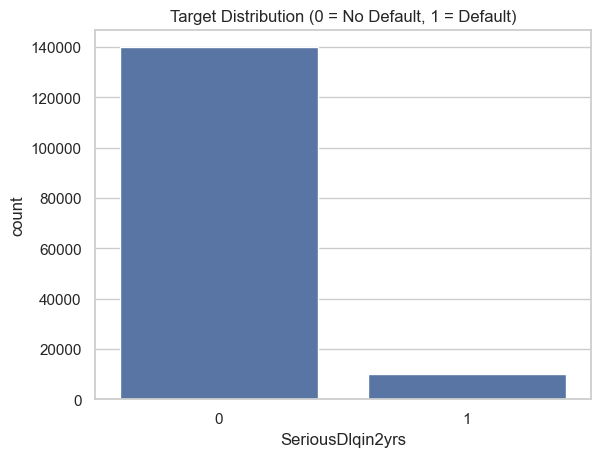

In [7]:
# Target variable name
target_col = "SeriousDlqin2yrs"

# Count of each target class (0 or 1)
print(df[target_col].value_counts())

# Percentage distribution of each class
print(df[target_col].value_counts(normalize=True) * 100)

# Plot the distribution of target values
sns.countplot(x=target_col, data=df)
plt.title("Target Distribution (0 = No Default, 1 = Default)")
plt.show()


Summary Statistics for Numerical Features

In [8]:
df.describe()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000,150000.000,150000.000,150000.000,150000.000,150000.000,120269.000,150000.000,150000.000,150000.000,150000.000,146076.000
mean,75000.500,0.067,6.048,52.295,0.421,353.005,6670.221,8.453,0.266,1.018,0.240,0.757
std,43301.415,0.250,249.755,14.772,4.193,2037.819,14384.674,5.146,4.169,1.130,4.155,1.115
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,37500.750,0.000,0.030,41.000,0.000,0.175,3400.000,5.000,0.000,0.000,0.000,0.000
50%,75000.500,0.000,0.154,52.000,0.000,0.367,5400.000,8.000,0.000,1.000,0.000,0.000
75%,112500.250,0.000,0.559,63.000,0.000,0.868,8249.000,11.000,0.000,2.000,0.000,1.000
max,150000.000,1.000,50708.000,109.000,98.000,329664.000,3008750.000,58.000,98.000,54.000,98.000,20.000


 Correlation Matrix

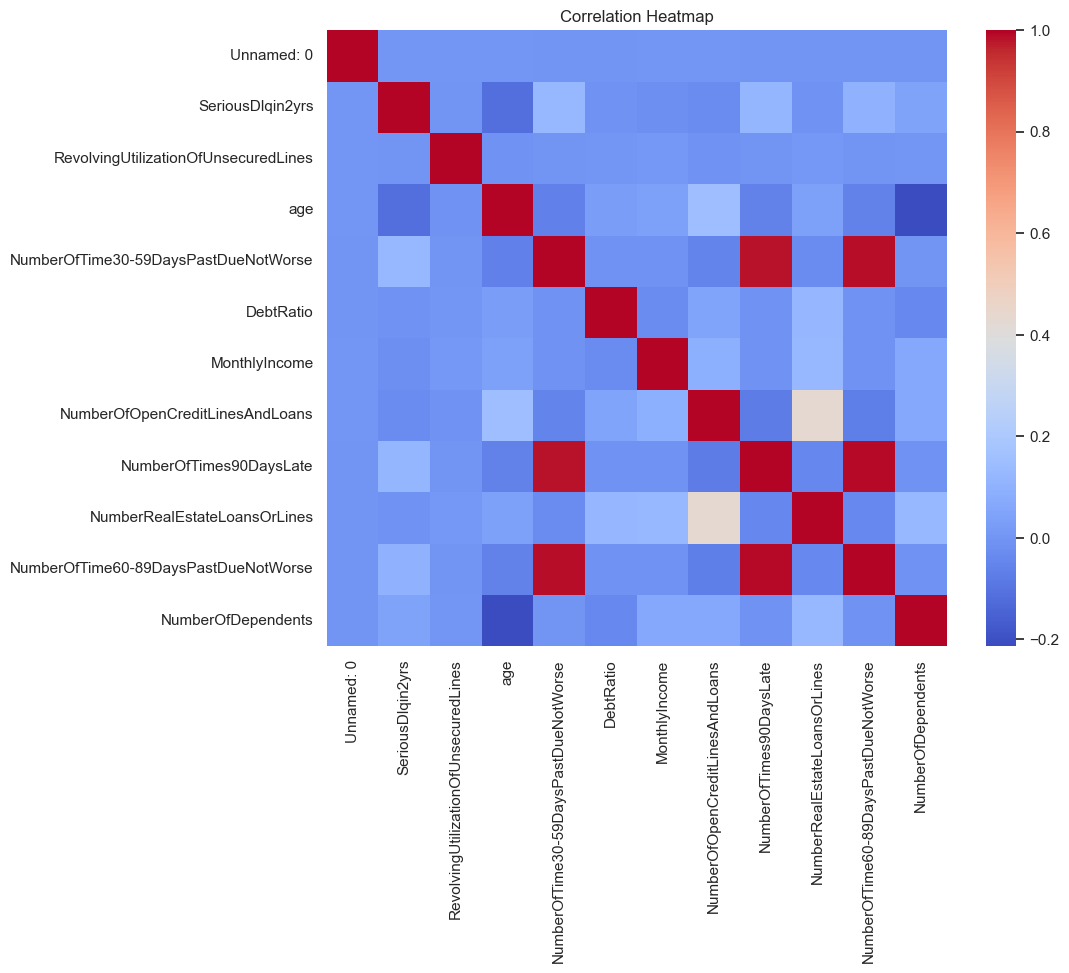

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


Saving an Interim Version

In [10]:
interim_path = "../data/interim/credit_data_initial.csv"
df.to_csv(interim_path, index=False)
